In [ ]:
import cv2
import librosa
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Spectrogram Oluşturma

In [ ]:
def create_spectrogram(y):
  spec = librosa.feature.melspectrogram(y = y)
  spec_conv = librosa.amplitude_to_db(spec, ref = np.max)  
  return spec_conv


# Görüntü İşleme

(374, 500, 3)


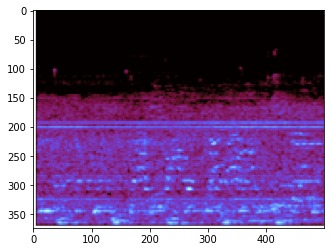

In [ ]:
# img_path = "C:\\Users\\batu_\\Downloads\\Spectrograms\\0-20220929T172951Z-001\\0\\13230-0-0-1.png"
img_path = r"C:\Users\batu_\Downloads\Spectrograms\0-20220929T172951Z-001\0\13230-0-0-1.png"
img = cv2.imread(img_path)

plt.imshow(img)
print(img.shape)

# GrayScale Dönüşümü

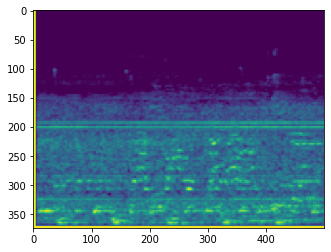

(374, 500)


In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.show()
print(gray_image.shape)

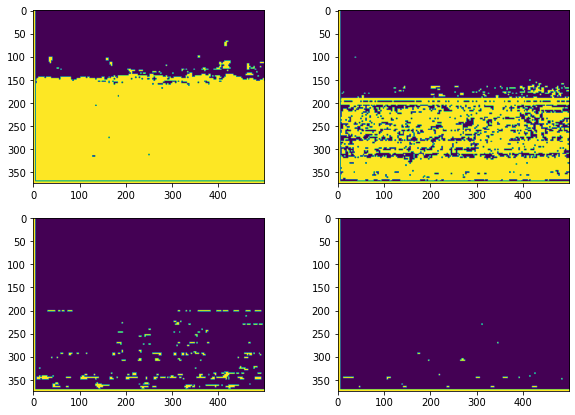

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,7))

(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 20, 255, cv2.THRESH_BINARY) # 20 üzerindeki bütün değerlere 255 atandı. Kalan değerlerse 0 olarak belirlendi.
axs[0, 0].imshow(blackAndWhiteImage)

(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY)
axs[0, 1].imshow(blackAndWhiteImage)

(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 160, 255, cv2.THRESH_BINARY)
axs[1, 0].imshow(blackAndWhiteImage)

(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY) # 1.resmin aksine beyaz ve beyaza çok yakın açık renkler 255 olarak atanırken kalan bütün değerler 0 olarak belirlendi. Bu da resmin çok koyu olmasını sağladı.
axs[1, 1].imshow(blackAndWhiteImage)

plt.show()

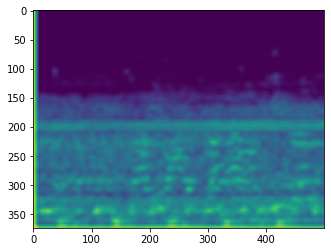

In [ ]:
bluring = cv2.blur(gray_image, (10, 10))
plt.imshow(bluring)
plt.show()

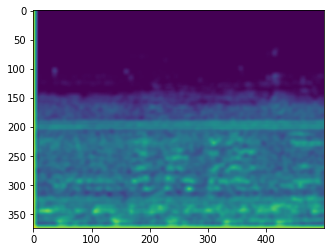

In [ ]:
gaussBlur = cv2.GaussianBlur(gray_image, (9, 9), 5)
plt.imshow(gaussBlur)
plt.show()

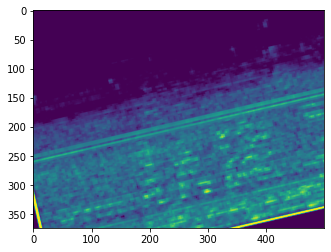

In [ ]:
(h, w) = img.shape[:2]
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 13, scale = 1.1)
rotated = cv2.warpAffine(gray_image, M, (w, h))
plt.imshow(rotated)
plt.show()

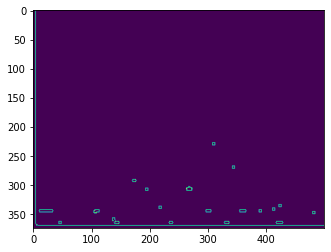

In [ ]:
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.GaussianBlur(output2, (5, 5), 3)
output2 = cv2.Canny(output2, 180, 255)
plt.imshow(output2)
plt.show()

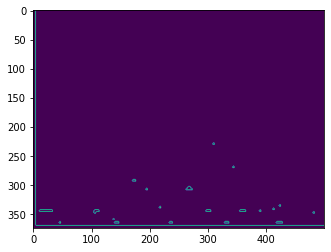

In [ ]:
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.Canny(output2, 180, 255)
plt.imshow(output2)
plt.show()

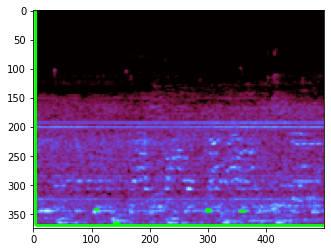

In [ ]:
lines = cv2.HoughLinesP(output2, 1, np.pi/180, 30)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 4)
plt.imshow(img)


# Normalizyon

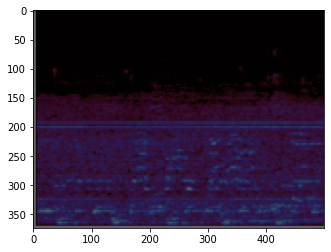

In [ ]:
image = cv2.imread(img_path)
# res_img = np.zeros((800, 800))
res_img = np.zeros((374, 500))
normalize_img = cv2.normalize(image, res_img, 0, 100, cv2.NORM_MINMAX)
plt.imshow(normalize_img)
plt.show()

# Resizing

Original Dimensions: (374, 500, 3)
Resized Dimensions: (224, 300, 3)


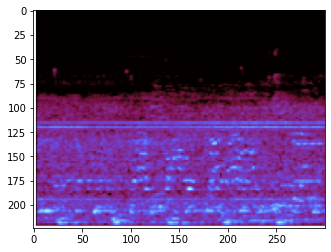

In [ ]:
img = cv2.imread(img_path)
print("Original Dimensions:", img.shape)

# scale_percent = 220
scale_percent = 60
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print("Resized Dimensions:", resized.shape)

plt.imshow(resized)
plt.show()


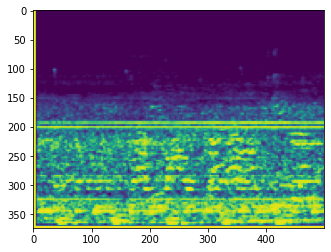

In [ ]:
equ = cv2.equalizeHist(gray_image) # resmin kontrastını iyileştirebilmek için
plt.imshow(equ)

In [ ]:
def spectrogram_change(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    res_img = np.zeros((374, 500))
    normalize_img = cv2.normalize(gray_image, res_img, 0, 100, cv2.NORM_MINMAX)

    scale_percent = 60
    width = int(normalize_img.shape[1] * scale_percent / 100)
    height = int(normalize_img.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    return resized


In [ ]:
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append([spectrogram_change(img), label])
    return images


In [ ]:
folders_path = "/content/drive/MyDrive/spectrograms/0"
arr_0 = np.array((load_images_from_folder(folders_path, 0)))

folders_path = "/content/drive/MyDrive/spectrograms/1"
arr_1 = np.array((load_images_from_folder(folders_path, 1)))

folders_path = "/content/drive/MyDrive/spectrograms/2"
arr_2 = np.array((load_images_from_folder(folders_path, 2)))

folders_path = "/content/drive/MyDrive/spectrograms/3"
arr_3 = np.array((load_images_from_folder(folders_path, 3)))

folders_path = "/content/drive/MyDrive/spectrograms/4"
arr_4 = np.array((load_images_from_folder(folders_path, 4)))

folders_path = "/content/drive/MyDrive/spectrograms/5"
arr_5 = np.array((load_images_from_folder(folders_path, 5)))

folders_path = "/content/drive/MyDrive/spectrograms/6"
arr_6 = np.array((load_images_from_folder(folders_path, 6)))

folders_path = "/content/drive/MyDrive/spectrograms/7"
arr_7 = np.array((load_images_from_folder(folders_path, 7)))

folders_path = "/content/drive/MyDrive/spectrograms/8"
arr_8 = np.array((load_images_from_folder(folders_path, 8)))

folders_path = "/content/drive/MyDrive/spectrograms/9"
arr_9 = np.array((load_images_from_folder(folders_path, 9)))

np_arr = np.concatenate([arr_0, arr_1, arr_2, arr_3, arr_4, arr_5, arr_6, arr_7, arr_8, arr_9], axis = 0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must speci

In [ ]:
df = pd.DataFrame(np.array(np_arr), columns = ['features', 'class'])
df.size

17464

In [ ]:
df.shape

(8732, 2)

In [ ]:
X = np.array(df['features'].tolist())
y = np.array(df['class'].tolist())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temporary, y_train, y_temporary = train_test_split(X,y, train_size=0.8) 
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

In [ ]:
print(X_train.shape, X_test.shape,  X_val.shape, y_train.shape, y_test.shape, y_val.shape)


(6985, 224, 300, 3) (874, 224, 300, 3) (873, 224, 300, 3) (6985,) (874,) (873,)


In [ ]:
X_test[100].shape

(224, 300, 3)

# CNN

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(24,kernel_size = (3, 3),strides = (1, 1),padding = "same",activation = "relu",input_shape = (224, 300, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


In [ ]:
model.add(tf.keras.layers.Conv2D(32,kernel_size = (3, 3),strides = (1, 1),padding = "same",activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64,kernel_size = (3, 3),strides = (1, 1),padding = "same",activation = "relu"))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [ ]:
# Compile the model
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
results = model.fit(X_train, y_train,
                     batch_size = 128,
                     epochs = 50,
                    validation_data = (X_val, y_val))

Epoch 1/50
55/55 [==============================] - 31s 299ms/step - loss: 26.9121 - accuracy: 0.1183 - val_loss: 2.2757 - val_accuracy: 0.1134
Epoch 2/50
55/55 [==============================] - 13s 244ms/step - loss: 2.2850 - accuracy: 0.1228 - val_loss: 2.2641 - val_accuracy: 0.1294
Epoch 3/50
55/55 [==============================] - 14s 247ms/step - loss: 2.2711 - accuracy: 0.1304 - val_loss: 2.2784 - val_accuracy: 0.1375
Epoch 4/50
55/55 [==============================] - 14s 246ms/step - loss: 2.2771 - accuracy: 0.1102 - val_loss: 2.2784 - val_accuracy: 0.1100
Epoch 5/50
55/55 [==============================] - 14s 247ms/step - loss: 2.2723 - accuracy: 0.1142 - val_loss: 2.2757 - val_accuracy: 0.1145
Epoch 6/50
55/55 [==============================] - 14s 251ms/step - loss: 2.2459 - accuracy: 0.1369 - val_loss: 2.1652 - val_accuracy: 0.2864
Epoch 7/50
55/55 [==============================] - 14s 254ms/step - loss: 2.1084 - accuracy: 0.2236 - val_loss: 1.8767 - val_accuracy: 0.343

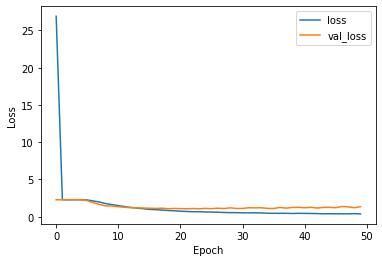

In [ ]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

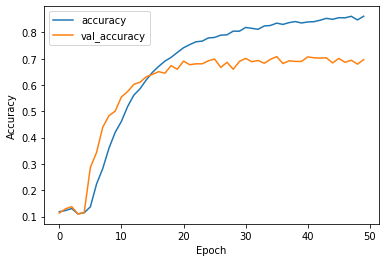

In [ ]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 10s 343ms/step - loss: 1.3271 - accuracy: 0.6831


[1.3270797729492188, 0.6830663681030273]

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1,224,300,3))

# Print the prediction result
prediction_result

# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [ ]:
print(f"this image belongs to class {predicted_class} with {predicted_probability} probability")

this image belongs to class 4 with 0.9429787397384644 probability
